In [18]:
# Importando as bibliotecas básicas para manipulação de arquivos e imagens
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os

In [19]:
# Criar diretórios de entrada e saída se não existirem
input_folder = "/content/data/input"
output_folder = "/content/data/output"
os.makedirs(input_folder, exist_ok=True)
os.makedirs(output_folder, exist_ok=True)

In [20]:
# Função para converter imagem colorida para tons de cinza sem usar bibliotecas
def convert_to_grayscale(image):
    """
    Converte uma imagem colorida para tons de cinza usando uma transformação manual.

    Parâmetros:
    - image: Matriz NumPy representando a imagem RGB.

    Retorna:
    - grayscale_image: Imagem convertida para tons de cinza.
    """
    altura, largura, _ = image.shape  # Obtendo dimensões da imagem (altura, largura, canais RGB)
    grayscale_image = np.zeros((altura, largura), dtype=np.uint8)  # Criando matriz para armazenar a nova imagem

    # Percorre cada pixel e aplica a fórmula de conversão para tons de cinza
    for i in range(altura):
        for j in range(largura):
            r, g, b = image[i, j]  # Obtém os valores de vermelho, verde e azul
            grayscale_image[i, j] = int(0.299 * r + 0.587 * g + 0.114 * b)  # Fórmula de luminância

    return grayscale_image

In [21]:
# Função para binarizar a imagem usando um limiar fixo
def binarize_image(grayscale_image, threshold=128):
    """
    Converte uma imagem em tons de cinza para binária (preto e branco) usando um limiar fixo.

    Parâmetros:
    - grayscale_image: Imagem em tons de cinza representada como matriz NumPy.
    - threshold: Valor de corte para definir os pixels como preto ou branco (padrão: 128).

    Retorna:
    - binary_image: Imagem binária (preto e branco).
    """
    altura, largura = grayscale_image.shape  # Obtendo dimensões
    binary_image = np.zeros((altura, largura), dtype=np.uint8)  # Criando matriz para armazenar a imagem binária

    # Percorre cada pixel e define como preto ou branco baseado no threshold
    for i in range(altura):
        for j in range(largura):
            if grayscale_image[i, j] > threshold:
                binary_image[i, j] = 255  # Branco
            else:
                binary_image[i, j] = 0  # Preto

    return binary_image

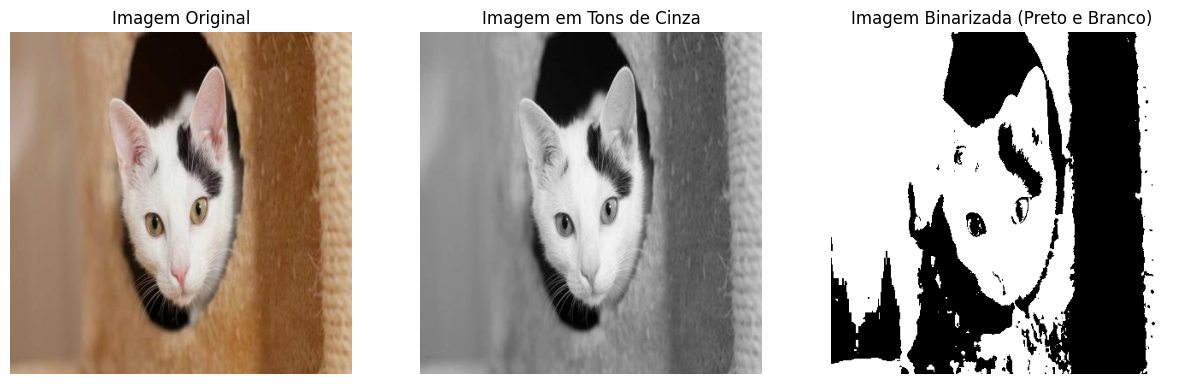

Imagem processada e salva: sample_image.jpg


In [22]:
# Processamento de todas as imagens dentro da pasta de entrada
for filename in os.listdir(input_folder):
    if filename.lower().endswith((".jpg", ".jpeg", ".png")):  # Filtra apenas arquivos de imagem suportados
        image_path = os.path.join(input_folder, filename)  # Caminho completo da imagem
        image = cv2.imread(image_path)  # Carrega a imagem (BGR)

        # Converte a imagem de BGR para RGB, pois OpenCV lê no formato BGR
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        # Converte para tons de cinza
        grayscale_image = convert_to_grayscale(image)

        # Converte para imagem binária
        binary_image = binarize_image(grayscale_image, threshold=128)

        # Salvar as imagens convertidas na pasta de saída
        grayscale_path = os.path.join(output_folder, f"gray_{filename}")
        binary_path = os.path.join(output_folder, f"binary_{filename}")

        cv2.imwrite(grayscale_path, grayscale_image)  # Salva a imagem em tons de cinza
        cv2.imwrite(binary_path, binary_image)  # Salva a imagem binária

        # Exibir as imagens
        fig, ax = plt.subplots(1, 3, figsize=(15, 5))

        ax[0].imshow(image)
        ax[0].set_title("Imagem Original")
        ax[0].axis("off")

        ax[1].imshow(grayscale_image, cmap="gray")
        ax[1].set_title("Imagem em Tons de Cinza")
        ax[1].axis("off")

        ax[2].imshow(binary_image, cmap="gray")
        ax[2].set_title("Imagem Binarizada (Preto e Branco)")
        ax[2].axis("off")

        plt.show()

        print(f"Imagem processada e salva: {filename}")